# Packages Loading


In [21]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from data_loading import read_hackathon_data
from data_preprocessing import MetricsProcessor
from sequence_processor.sequence import SequenceProcessor
from streamlit_app.graph_tools import evolution_to_networkx, evolution_to_graphviz


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Data


In [2]:
path = Path("data_config.yaml")
df_hack = read_hackathon_data(path, attach_users=True)
df_hack.head()


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,student_2
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,student_2
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,student_2
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,student_2
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,student_2


# Initialize Metrics Processor


In [13]:
processor = MetricsProcessor()


# Metrics Calculation


In [14]:
graph_metrics = processor.calculate_graph_metrics(df_hack)
graph_metrics.head()


100%|██████████| 50/50 [00:02<00:00, 21.12it/s]


,kernel_id,modularity,average_degree,average_clustering
0,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.584378,5.071429,0.161154
1,1d8c1c38-d342-4950-9667-f8b9872d71b7,0.510842,5.578947,0.078947
2,232bcb48-7455-4109-9eeb-809649a6bedc,0.474784,12.985507,0.287237
3,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793
4,2bc4e2c9-833e-454f-8c6c-2dff1e6e60e9,0.517000,5.037037,0.342387


In [15]:
list(graph_metrics)


['kernel_id', 'modularity', 'average_degree', 'average_clustering']

# Create a graph from Sequence

In [19]:
grouped = processor._preprocess_dataframe_columns(df_hack).groupby('kernel_id')
sequence_processor = SequenceProcessor(list(grouped)[0][1])
G = evolution_to_graphviz(sequence_processor, 10)
G

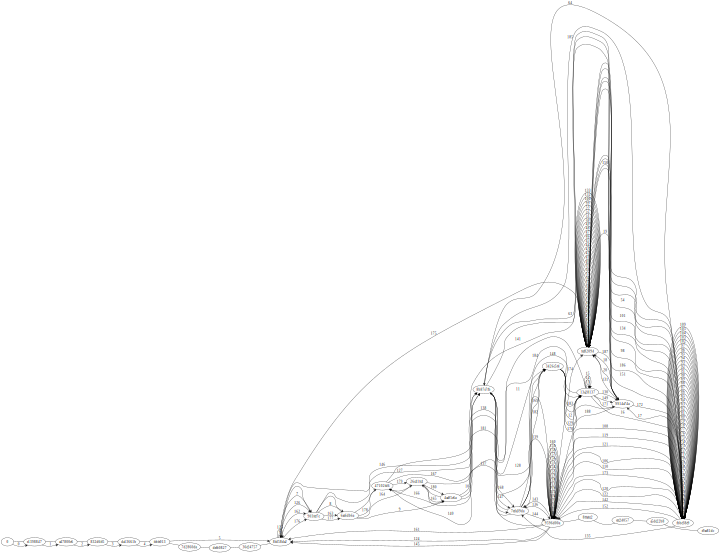

In [20]:
G = evolution_to_graphviz(sequence_processor, len(sequence_processor.snapshots))
G

In [17]:
H = evolution_to_networkx(sequence_processor, len(sequence_processor.snapshots))
H